#### _Speech Processing Labs 2020: Signals: Module 1_

In [1]:
## Run this first!
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np

import cmath
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.style.use('ggplot')

from dspMisc import *

# 3 Digital Signals: Sampling and Superposition

### Learning Outcomes
* Understand how we can approximate a sine wave with a specific frequency, given a specific sampling rate
* Understanding how sampling rate limits the types of sinusoids we can describe with discrete sequences
* Understand the concept of aliasing and how this relates the sampling rate and the Nyquist frequency.
* Observe how compound waveforms can be described as a linear combination of phasors ('superposition')

### Need to know
* Topic Videos: Digital Signal, Short Term Analysis, Series Expansion
* [Phasors, complex numbers and sinusoids](./sp-m1-2-digital-signals-complex-numbers.ipynb)


## 3.1 Sampling Rates and Phasor Frequencies

In the previous [notebook](./sp-m1-2-digital-signals-complex-numbers.ipynb), we saw how we could represent sinusoids by rotating a complex number around a circle at a specific angular frequency, i.e. a phasor.  So, how do we generate a phasor with a specific frequency $f$?  Remember, we're dealing with the digital world here, so if we want to analyze a wave, we also need to sample it at a specific **sampling rate**, $f_s$. 

For a given sampling rate $f_s$ (samples/second) we can work out the time between each sample as:

$$t_s = \frac{1}{f_s}$$ 

The units of $t_s$ is seconds/sample.  That means that if we want a phasor to complete $f$ cycles/second, we need to calculate how big each $\theta_s$ step (angle) we need to rotate our phasor every $t_s$ seconds. 

The units here help us figure this out: the desired frequency $f$ has units cycles/second. So, we can calculate what fraction of a complete cycle we need to take with each sample by multiplying $f$ with the sampling time $t_s$. 
* $c_s = ft_s$.  
* cycles/sample  = cycles/second x seconds/sample 

We know each cycle is $2\pi$ radians (360 degrees), so we can then convert $c_s$ to an angle as follows: 
* $ \theta_s = 2 \pi c_s $


### Exercise

Q: Calculate the angle between samples for a given frequency $f=8$ Hz and sampling rate of $f_s=64$  


### Notes

$$\theta_{s} = 2\pi c_{s} = 2\pi f t_{s} = 2\pi \left(8\right) \left(\tfrac{1}{64}\right) = \tfrac{\pi}{4}$$

### Setting the Phasor Frequency
Now, we can write a function that calculates the complex values (`zs`), angles  (`thetas`) and time steps (`tsteps`) for a phasor with a given frequency `freq` over a given time period (`Tmin` to `Tmax`). 

In [3]:
## A function that returns the complex numbers corresponding to the sine wave
## from time Tmin to Tmax, given a sample time of t_step and a desired 
## frequency (freq)

def gen_phasor_vals_freq(Tmin=0, Tmax=10, t_step=0.23, freq=None, R=1):    
    # generate the sequence of times for our samples
    tsteps = np.arange(Tmin, Tmax, t_step)
    
    # if we want to match this to a given frequency:
    if freq != None:
        rads_per_sec = 2*np.pi*freq
        theta_s = rads_per_sec*t_step
        thetas = np.arange(Tmin*rads_per_sec, Tmax*rads_per_sec, theta_s)
        
    # otherwise assume that rotating t_step radians takes t_step seconds
    else: 
        thetas = np.arange(Tmin, Tmax, t_step)

    ## A sequence of complex numbers corresponding to our sequence of angles `thetas`
    zs = R*np.exp(1j*thetas)
 
    ## For convenience we return the theta values and time steps as well
    return zs, thetas, tsteps



### Example: 

Let's look at a phasor and corresponding sine wave with frequency $f=2$ Hz (`freq`), given a sampling rate of $f_s=16$ (`sampling_rate`) over 4 seconds. 

In [4]:
## Our parameters:
Tmax = 4
Tmin = 0

freq = 2     # cycles/second
sampling_rate = 16 # f_s above
t_step=1/sampling_rate

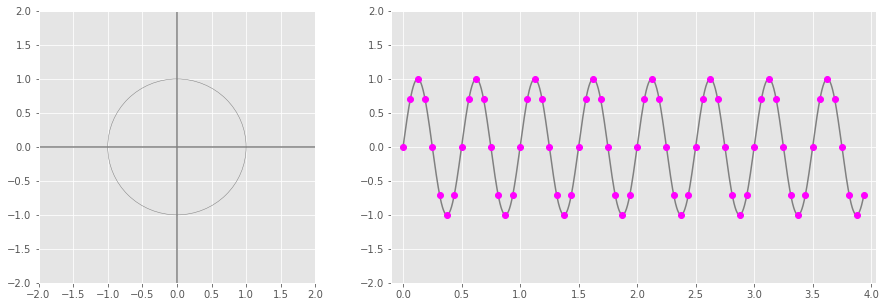

In [5]:
## Get our complex values corresponding to the phasor with frequency freq
zs, thetas, tsteps = gen_phasor_vals_freq(Tmin=Tmin, Tmax=Tmax, t_step=t_step, freq=freq)

## Project to real and imaginary parts for plotting
As = np.real(zs)
Bs = np.imag(zs)
A, B, n_samples = get_line_coords(As, Bs)

## generate the background
fig, phasor, sinusoid = create_anim_bkg(tsteps, thetas, freq)

## Plot our actual sampled sine wave in magenta
sinusoid.plot(tsteps, Bs, 'o', color='magenta')


In [6]:
## Animate
phasor.scatter(As, Bs)
line = phasor.plot([], [], color='b', lw=3)[0]
sin_t = sinusoid.plot([], [], 'o', color='b')[0]
figs = (line, sin_t)
anim = FuncAnimation(
    fig, lambda x: anim_sinusoid(x, X=A, Y=B, tsteps=tsteps, figs=figs), interval=600, frames=n_samples)
 
HTML(anim.to_html5_video())



### Exercise 
Change the `freq` variable in the code below to investigate: 

* What happens when the sine wave frequency (cycles/second) is equal to `sample_rate/2`
* What happens when the sampling time (`t_step`) is near half the period (`1/freq`)?
* What happens when the frequency is greater than `sample_rate/2`

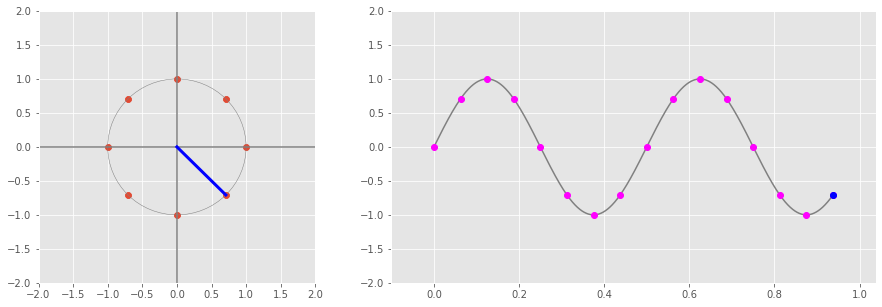

In [21]:
## Example: Play around with these values
Tmax = 1
Tmin = 0

freq = 2   # cycles/second
sampling_rate = 16 # f_s above
t_step=1/sampling_rate

## Get our complex values corresponding to the sine wave
zs, thetas, tsteps = gen_phasor_vals_freq(Tmin=Tmin, Tmax=Tmax, t_step=t_step, freq=freq)

## Project to real and imaginary parts for plotting
As = np.real(zs)
Bs = np.imag(zs)
A, B, n_samples = get_line_coords(As, Bs)

## generate the background
fig, phasor, sinusoid = create_anim_bkg(tsteps, thetas, freq)

## Plot our actual sampled sine wave in magenta
sinusoid.plot(tsteps, Bs, 'o', color='magenta')

## Animate
phasor.scatter(As, Bs)
line = phasor.plot([], [], color='b', lw=3)[0]
sin_t = sinusoid.plot([], [], 'o', color='b')[0]
figs = (line, sin_t)
anim = FuncAnimation(
    fig, lambda x: anim_sinusoid(x, X=A, Y=B, tsteps=tsteps, figs=figs), interval=600, frames=n_samples)
 
HTML(anim.to_html5_video())


###  Notes


- When `freq = sample_rate/2`, we only observe two points per cycle, resulting in a line.
- When `t_step = 1/freq`, we only observe one point per cycle, also resulting in a line.
- When `freq > sample_rate/2`, we sample too infrequently and do not capture the true shape of the sinusoid.

## 3.2 Aliasing

If you change the frequency (`freq`) for the phasor to be higher than half the sampling rate (`sample_rate/2`), you'll see that the actual frequency of the sinusoid doesn't actually keep getting higher.  In fact, with `freq=8` the sine wave (i.e. projection of the imaginary component) doesn't appear to have any amplitude modulation at all.  However, keen readers will note that for this `freq=8` example, the real projection (i.e. cosine) would show amplitude modulations since cos(t) is 90 degree phase shifted relative to sine(t). The phasor `freq=15` appears to complete only one cycle per second, just like for `freq=1`.  

These are examples of **aliasing**: given a specific sampling rate there is a limit to which we can distinguish different frequencies because we simply can't take enough samples to show the difference! 

In the example above, even though we are sampling from a 15 Hz wave for `freq=15`, we only get one sample per cycle and the overall sampled sequence looks like a 1 Hz wave. 

<div class="alert alert-warning">
In general, with a sampling rate of $f_s$ we can't distinguish between a sine wave of frequency $f_0$ and a sine wave of $f_0 + kf_s$ for any integer $k$.
</div>

This means that we can't actually tell the frequency of the underlying waveform just based on the sample amplitudes alone. 

The practical upshot of this is that for sampling rate $f_s$, the highest frequency we can actually sample is $f_s/2$, often called the **Nyquist Frequency**.  This is one of the most important concepts in digital signal processing and will effect pretty much all the methods we use.  So, if you remember just one thing, remember this! 



## 3.3 Superposition

This use of phasors to represent sinusoids may seem excessively complex at the moment, but it actually gives us a nice way of visualizing what happens when we add two sine waves together, i.e. linear superposition.  

Eventually we'll see how the Fourier Transform gives us a way of breaking down periodic waveforms (no matter how complicated) into a linear combination of sine waves (or equivalently cosine waves, as the case may be).  We'll see that this makes life a lot easier for analyzing the spectrum of speech sounds.  But for now, let's just look at how can combining phasors can let us define complicated waveforms in a simple manner. 



### Magnitude and Phase Modifications
First, let's note that we can easily change the magnitude and phase of a sine wave before adding it to others to make a compound waveform. 

* We can change the magnitude of a sinusoidal component by multiplying all the values of that sinusoid by a scalar $r$.

* We can apply a phase shift of $\phi$ radians to $\sin(t)$ to gives us a sine wave of the form: $\sin(\theta + \phi)$.  It basically means we start our cycles around the unit circle at $e^{i\phi}$ instead of at $e^{i0} = 1 + i0 = (1,0)$ 

### Generating linear combinations of sinusoids

Let's plot some combinations of sinusoids.

First let's set the sampling rate and the start and end times of the sequence we're going to generate:

In [22]:
## Some parameters to play with 
Tmax = 2
Tmin = 0

sampling_rate = 16
t_step=1/sampling_rate

Now, let's create some phasors with different magnitudes, frequencies and phases

In [58]:
## Define a bunch of sinusoids.  We can do this in terms of 3 parameters:  
## (magnitude, frequency, phase)
## The following defines two sinusoids, both with magnitude (peak amplitude) 1 and the same phase (no phase shift) 
## The second has double the frequency of the first:
freq=2
# params = [(1, freq, 0), (1, 2*freq, 0)]
# params = [(1, freq, 0), (2, freq, 0)]
params = [(1, freq, 0), (0.4, 5*freq, 0), (0.4, 5*freq, np.pi)]

## Ex: change these values and see what happens, e.g. 
#params = [(1, freq, 0), (0.4, 5*freq, 0), (0.4, 5*freq, np.pi)]  

In [59]:
## Get the real and imaginary parts to plot in rectangular coordinates
# Using numpy built in

phasor_list = []
theta_list = []
tsteps_list = []

## Generate sinusoids for each set of (mag, freq, phase) parameters
for mag, freq, phase in params: 
    ## Generate a phasor with frequency freq
    zs, thetas, tsteps = gen_phasor_vals_freq(Tmin=Tmin, Tmax=Tmax, t_step=t_step, freq=freq) 
    
    ## Apply the phase shift
    phase_shift = np.exp(1j*phase)
    zs = mag*zs*phase_shift
    
    ## Append the phasor to a list
    phasor_list.append(zs)
    
    ## The angle sequence and time sequence in case you want to inspect them
    ## We don't actually use them below
    theta_list.append(thetas)
    tsteps_list.append(tsteps)

## Superposition - add the individual phasors in the list together (all with the same weights right now)
zs_sum = np.zeros(len(tsteps_list[0]))
for z in phasor_list: 
    zs_sum = zs_sum + z



Now, we can plot the sine component of the phasors (on the right)

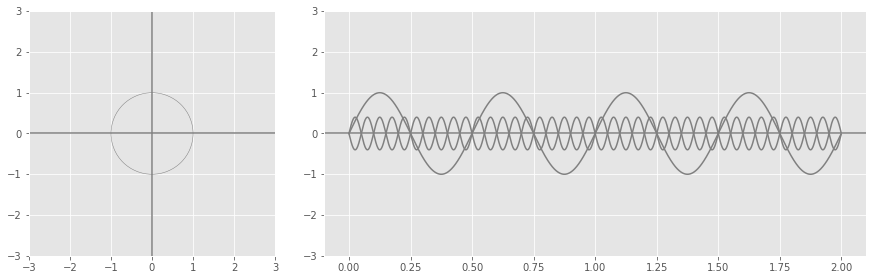

In [60]:
## Plot the phasor (left) and the projection of the imaginary (vertical) component (right)
## rproj would be the projection to the real axis, but let's just ignore that for now

fig, phasor, iproj, rproj = create_phasor_sinusoid_bkg(Tmin, Tmax, ymax=3, plot_phasor=True, plot_real=False, plot_imag=True,)

dense_tstep=0.001
for mag, freq, phase in params:  
    ## We just want to plot the individual sinusoids (time v amplitude), so we ignore 
    ## the complex numbers we've been using to plot the phasors
    _, dense_thetas, dense_tsteps = gen_phasor_vals_freq(Tmin, Tmax, dense_tstep, freq)    
    iproj.plot(dense_tsteps, mag*np.sin(dense_thetas+phase), color='grey')

now plot the sum of the phasors (left) and the projected imaginary component in magenta (right) - that is, the sum of the sine components (in grey)

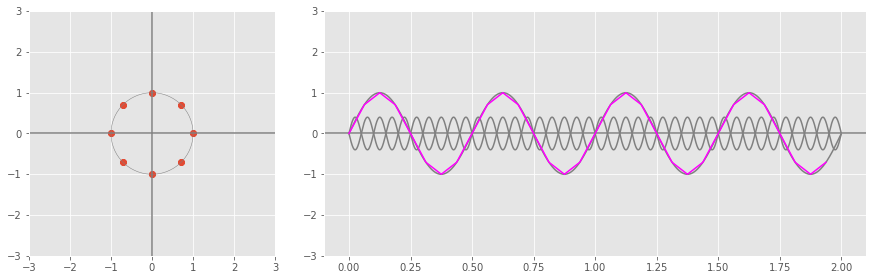

In [61]:
## Plot sinusoids as sampled
Xlist = []
Ylist = []

dense_tstep=0.001
for i, zs in enumerate(phasor_list):
    Xs_ = np.real(zs)
    Ys_ = np.imag(zs)
    X_, Y_, _ = get_line_coords(Xs_, Ys_)
    Xlist.append(X_)
    Ylist.append(Y_)


Xs = np.real(zs_sum)
Ys = np.imag(zs_sum)
Xline, Yline, _ = get_line_coords(Xs, Ys)

iproj.plot(tsteps_list[0], Ys, color='magenta')
phasor.scatter(Xs, Ys)
fig

Now let's see an animation of how we're adding these phasors together! 

In [62]:
anim = get_phasor_animation(Xline, Yline, tsteps, phasor, iproj, rproj, fig, Xlist=Xlist, Ylist=Ylist, params=params)
anim

### Exercise:


* What happens when you add up two sinusoids with the same frequency but different magnitudes
    * e.g. `params = [(1, freq, 0), (2, freq, 0)]`
    
    
* What happens when you change the phase? 
    * Can you find $\phi$ such that $\sin(\theta+\phi) = \cos(\theta)$ ? 
    
    
* When do the individual sinusoids cancel each other out? 


* Assume you have a compound sinusoid defined by the following params: 
    * `params = [(1, freq, 0), (0.4, 5*freq, 0)]`  
    * What sinusoid could you add to cancel the higher frequency component out while keeping the lower frequency one? 


### Notes


- Both of the magnitudes are added while maintaining the same phase, resulting in a larger amplitude.
- $\phi = 90$
- Sinusoids cancel out when they have the same frequency but orthogonal phases.
- `(0.4, 5*freq, np.pi)`

_Next we'll look at the Discrete Fourier Transform in more detail_